## 911 Emergency Calls - Data Analysis Project

### The number "911" is the universal emergency number in the United States.
**A 911 emergency is when someone needs help right away because of an injury or an immediate danger. For example, 911 is called when:**
- there's a fire
- someone has passed out
- you see a crime happening, like a break-in
- you are in or see a serious car accident

### This dataset consists of 911 calls made in the Montgomery County, Pennsylvania from Dec, 2015 to Aug, 2016

**Let's start by importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Setting chart style and increasing the font size for chart labels**

In [112]:
sns.set_style('darkgrid')

In [4]:
sns.set_context('notebook',font_scale = 1.2)

**Let's read/import the csv file as a dataframe**

In [5]:
df = pd.read_csv('911.csv')

## Data Exploration

**Let's check the head and tail of our data**

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df.tail()

# The 'title' column seems to describe two things:
# 1. The Category of the emergency, such as EMS, Fire, Traffic
# 2. The actual Reason for the call such as DIABETIC EMERGENCY, CARDIAC EMERGENCY, GAS-ODOR/LEAK, etc.
# 3. We will create 2 different columns from this one for 'Category' and other for 'Reason'

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


**Let's check the datatypes of every column and also count the number of rows and columns in our dataset**

In [8]:
df.info()

# Size of our dataset: num of Rows = 99,492 & num of columns = 9
# There are 3 columns with missing values, viz. 'zip','twp','addr' with zip code having the highest no. of missing values.

# IMPORTANT: The 'timeStamp' column is of object datatype. It must be set to datetime, so that 
# we can do weekly, monthly, yearly analysis of our data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**The last column named 'e' seems to have only one value, i.e. 1. Let's check if that's true**

In [9]:
df['e'].value_counts() 

# Confirmed. All the values in the last column 'e' are 1. Hence, it's a dummy column.

1    99492
Name: e, dtype: int64

## Let's describe our data

 **So, the 9 columns are as follows:**
 -    **lat** - lattitude of the location from where the call was made - dtype: float64
 -    **lng** - longitude of the location from where the call was made - dtype: float64
 -    **desc** - description, which seems to be combination of address, township and timestamp columns - dtype: object 
 -    **zip**  - is the zip code of the location (like pincode in India) - dtype: float64
 -    **title** - describes the reason for the 911 emergency call - dtype: object 
 -    **timeStamp** - states the date and time of the call - dtype: object 
 -    **twp** - township (town) from where the call was made - dtype: object 
 -    **addr** - lists the complete address of the location - dtype: object 
 -    **e**    - dummy column with all its values set to 1 - dtype: int64 

**Let's check the datatype of the 'timeStamp' column**

In [10]:
type(df['timeStamp'][0]) 

# So, timeStamp column has String objects

str

## Data Cleaning and Transformation

### Let's change the datatype of 'timeStamp' column to datetime and confirm it

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df.dtypes   # It's been changed successfully.

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
dtype: object

### Let's create new columns to capture the year, month, week, day_of_week and hour of all the 911 calls

In [13]:
df['year'] = df['timeStamp'].apply(lambda x: x.year)

**Let's check if the year column is created or not**

In [14]:
df.tail(3)    # Success

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,2016
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,2016
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,2016


**Let's create the rest of the columns**

In [15]:
df['month'] = df['timeStamp'].apply(lambda x: x.month)

In [16]:
df['week'] = df['timeStamp'].apply(lambda x: x.week)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

**Let's check the new columns**

In [17]:
df.tail(3)

# We have successfully added the 'year', 'month', 'week', 'day_of_week' and 'hour' columns.
# 'week' column represents the week of the year (not the month).

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,2016,8,34,2,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,2016,8,34,2,11
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,2016,8,34,2,11


In [18]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,50,3,17


**Let's check all the unique values of 'day_of_week' column**

In [19]:
df['day_of_week'].unique()

# So, day_of_week begins with 0 and ends at 6.

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

- **In Pandas, day of the week starts with Monday=0 and ends with Sunday=6.**
###  Let's create a new column for day_name

In [20]:
df['day_name'] = df['day_of_week'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

**Let's check the new column**

In [21]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17,Thur


In [22]:
df.tail(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,2016,8,34,2,11,Wed
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,2016,8,34,2,11,Wed


In [23]:
df['day_name'].unique()

array(['Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

**Let's also create a new column for month_name and confirm it**

In [24]:
df['month_name'] = df['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [25]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17,Thur,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17,Thur,Dec


### Let's create two new columns 'category' and 'reason' from the 'title' column
- 'title' column has values such as 'EMS: DIABETIC EMERGENCY', 'Traffic: VEHICLE ACCIDENT', etc.**
- It's evident that the text before the ':' colon is the category, followed by the reason for the call**

In [26]:
df['category'] = df['title'].apply(lambda x: x.split(':')[0])

In [27]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[1])

**Checking the new columns**

In [28]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17,Thur,Dec,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,50,3,17,Thur,Dec,Fire,GAS-ODOR/LEAK


In [29]:
df.tail(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,2016,8,34,2,11,Wed,Aug,EMS,NAUSEA/VOMITING
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,2016,8,34,2,11,Wed,Aug,Traffic,VEHICLE ACCIDENT -


### Let's create a new column for distinguishing time as AM or PM

**Checking all the unique values in the hour column sorted in an ascending order.**

In [30]:
df['hour'].value_counts().index.sort_values()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

**Let's create a function which takes hour as an argument and returns AM or PM.**

In [31]:
def ampm(hour):
    if hour >= 0 and hour < 12:
        return 'AM'
    else:
        return 'PM'

**Checking if the function is functioning correctly**

In [32]:
ampm(12)   # passed several values for the 'hour' argument. It's functioning correctly.

'PM'

**Creating and testing the new 'AM_PM' column**

In [33]:
df['AM_PM'] = df['hour'].apply(ampm)

In [34]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17,Thur,Dec,EMS,BACK PAINS/INJURY,PM
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY,PM


In [35]:
df.tail(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,2016,8,34,2,11,Wed,Aug,EMS,NAUSEA/VOMITING,AM
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,2016,8,34,2,11,Wed,Aug,Traffic,VEHICLE ACCIDENT -,AM


### Let's create another column for identifying the days as a Weekday or a Weekend

**Let's get the list of all unique day names first** 

In [36]:
df['day_name'].unique()

array(['Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

**Let's create a function which takes day_name as an argument and returns Weekday or Weekend**

In [37]:
def weekend(day_name):
    if day_name == 'Mon' or day_name == 'Tue' or day_name == 'Wed' or day_name == 'Thur' or day_name == 'Fri':
        return 'Weekday'
    elif day_name == 'Sat' or day_name == 'Sun':
        return 'Weekend'

**Let's test the function**

In [38]:
weekend('Thur')  # Passed different values for the day_name argument to test the function. It's working correctly.

'Weekday'

**Let's create the new 'day_type' column now**

In [39]:
df['day_type'] = df['day_name'].apply(weekend)

In [40]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,50,3,17,Thur,Dec,EMS,BACK PAINS/INJURY,PM,Weekday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,50,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY,PM,Weekday


### Adding a new column for date

In [41]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [42]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,...,50,3,17,Thur,Dec,EMS,BACK PAINS/INJURY,PM,Weekday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,...,50,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY,PM,Weekday,2015-12-10


### Adding a new column for week as a string (in the format 'Wk52' instead of 52 as an integer)

In [117]:
'Wk'+str(50)

'Wk50'

In [118]:
df['week_string'] = df['week'].apply(lambda x: 'Wk'+str(x))

In [119]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type,date,week_string
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,...,3,17,Thur,Dec,EMS,BACK PAINS/INJURY,PM,Weekday,2015-12-10,Wk50
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,...,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY,PM,Weekday,2015-12-10,Wk50
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,...,3,17,Thur,Dec,Fire,GASODOR/LEAK,PM,Weekday,2015-12-10,Wk50


## Data Analysis and Visualization

**Let's start by answering some simple questions**

**Q. Which townships have the highest number of 911 calls (top 5)?**

In [43]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

(0.0, 9000.0)

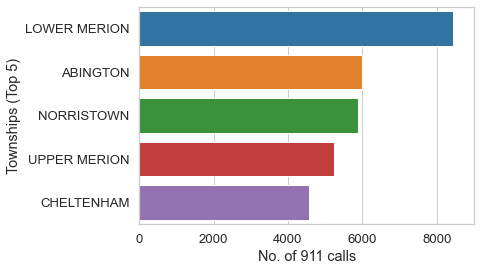

In [44]:
plt.figure(figsize=(6,4))

sns.countplot(y='twp', data = df, order = df['twp'].value_counts().index[:5])

plt.xlabel('No. of 911 calls')
plt.ylabel('Townships (Top 5)')
plt.xlim(0,9000)

**Q. Which zip codes have the highest number of 911 calls (top 5)?**

In [45]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Q. Which days of the week receive the highest number of 911 calls?**

In [46]:
df['day_name'].value_counts()

# OBSERVATION: Weekends tend to have the lowest number of 911 calls.

# IMPORTANT: Let's add a new column for 'day_type' (weekday or weekend) in the above 'Data Transformation' section

Tue     15150
Wed     14879
Fri     14833
Mon     14680
Thur    14478
Sat     13336
Sun     12136
Name: day_name, dtype: int64

Text(0, 0.5, 'Day')

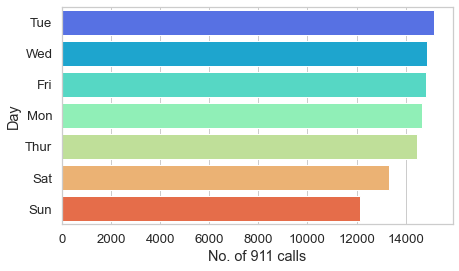

In [47]:
plt.figure(figsize = (7,4))

sns.countplot(y = 'day_name', data = df, order = df['day_name'].value_counts().index, palette = 'rainbow')

plt.xlabel('No. of 911 calls')
plt.ylabel('Day')

**Q. Let's find out the average number of calls on Weekdays Vs. Weekends**

In [48]:
df['day_type'].value_counts()  # Total number of calls on Weekdays Vs Weekends

Weekday    74020
Weekend    25472
Name: day_type, dtype: int64

In [49]:
df['day_type'].value_counts()['Weekday']/5  # Average number of calls on a weekday

14804.0

In [50]:
df['day_type'].value_counts()['Weekend']/2  # Average number of calls on a weekend

12736.0

**Q. Which hours of the day have highest number of 911 calls?**

In [51]:
df['hour'].value_counts().head(10)

# Observation: 3-5 pm are the busiest hours of the day

# IMPORTANT: Let's add a new column for 'AM or PM' in the above 'Data Transformation' section

17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
Name: hour, dtype: int64

**Q. Which hours of the day have lowest number of 911 calls?**

In [52]:
df['hour'].value_counts().tail()

# OBSERVATION: The early morning hours from 1 am to 5 am have the lowest number of calls, as expected.

1    1721
5    1629
2    1549
3    1435
4    1418
Name: hour, dtype: int64

(0.0, 7000.0)

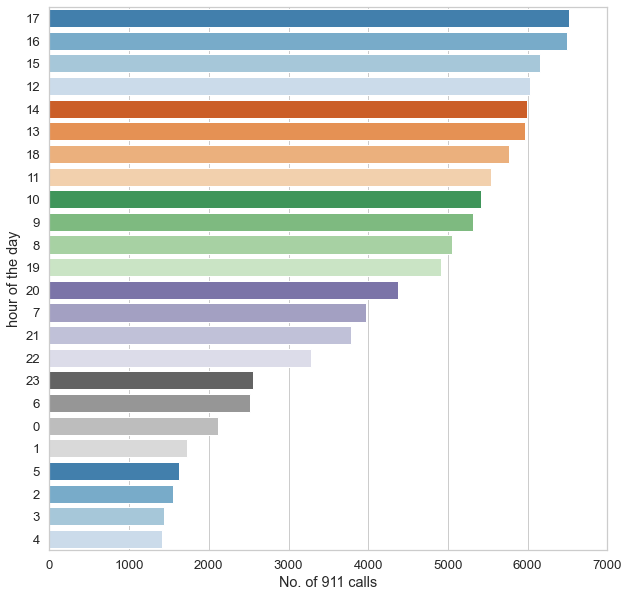

In [53]:
plt.figure(figsize=(10,10))

sns.countplot(y = 'hour', data = df, order = df['hour'].value_counts().index, palette = 'tab20c')

plt.xlabel('No. of 911 calls')
plt.ylabel('hour of the day')
plt.xlim(0,7000)

**What's the distribution of calls as AM Vs PM calls?**

In [54]:
df['AM_PM'].value_counts()

PM    61831
AM    37661
Name: AM_PM, dtype: int64

**62.15% of the total calls are made in PM hours**

In [55]:
round((df['AM_PM'].value_counts()['PM']/df['AM_PM'].count())*100,2)

62.15

Text(0, 0.5, 'No. of 911 calls')

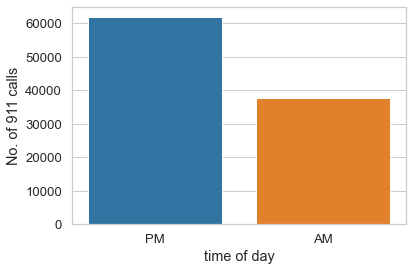

In [56]:
sns.countplot(x = 'AM_PM', data = df)

plt.xlabel('time of day')
plt.ylabel('No. of 911 calls')

**Q. How are the calls distributed over different months?**

In [57]:
df['month_name'].value_counts()

# Observations: 
# 1. Jan and Jul tends to have the highest number of calls
# 2. Aug and Dec have the lowest number of calls 
# IMPORTANT:
# 3. We seem to be missing 3 months of data, let's double check 

Jan    13205
Jul    12137
Jun    11786
Feb    11467
May    11423
Apr    11326
Mar    11101
Aug     9078
Dec     7969
Name: month_name, dtype: int64

In [58]:
df['month_name'].nunique()  # 3 months of data missing 

9

In [59]:
df['month'].value_counts().index.sort_values()

# month numbers 9,10,11 are missing
# Data for September, October & November is missing.

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64')

(0.0, 14000.0)

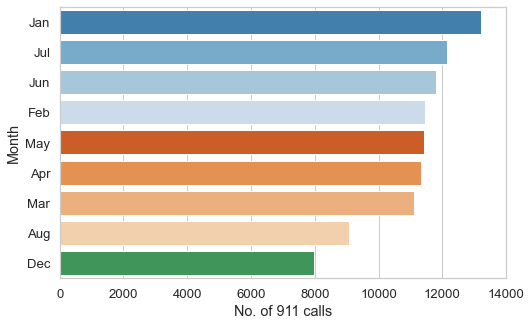

In [60]:
plt.figure(figsize = (8,5))

sns.countplot(y = 'month_name', data = df, order = df['month_name'].value_counts().index, palette = 'tab20c')

plt.xlabel('No. of 911 calls')
plt.ylabel('Month')
plt.xlim(0,14000)

**Q. How many years of data do we have?**

In [61]:
df['year'].unique()

# We have only two years of data for 2015 and 2016

array([2015, 2016], dtype=int64)

**Q. Do we have comparable data for both the years?**

In [62]:
df['year'].value_counts()

2016    91523
2015     7969
Name: year, dtype: int64

- From above, we see that almost all of our data comes from the year 2016,
- Hence, it's not suitable to do any type of yearly analysis

**Q. How many unique categories of 911 calls do we have?**

In [63]:
df['category'].nunique()

3

In [64]:
df['category'].value_counts()

# So, we have 3 different categories of 911 calls, viz.
# EMS, Traffic and Fire

EMS        48877
Traffic    35695
Fire       14920
Name: category, dtype: int64

(0.0, 50000.0)

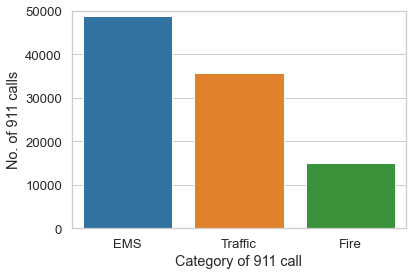

In [65]:
sns.countplot(x='category',data=df, order=df['category'].value_counts().index)

plt.xlabel('Category of 911 call')
plt.ylabel('No. of 911 calls')
plt.ylim(0,50000)

**Q. How many unique reasons do we have for 911 calls?**

In [66]:
df['reason'].nunique()

81

**Q. What are the top 10 reasons for 911 calls?**

In [67]:
df['reason'].value_counts().head(10)

# OBSERVATION: Vehicle Accident seems to occur twice in our dataset, in two different forms. (One followed by a hyphen)
# (Other without the hyphen) Let's fix that. 

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
 FALL VICTIM               4863
 ROAD OBSTRUCTION -        3144
 SUBJECT IN PAIN           2687
 HEAD INJURY               2631
Name: reason, dtype: int64

In [68]:
# How many unique titles do we have? (since, 'category' and 'reason' columns are derived from the 'title' column)

df['title'].nunique()

110

**Listing all the unique titles**

In [69]:
df['title'].unique()

# The hyphens in the titles seem to be unnecessary. Let's get rid of these hyphens from the 'reason' column, not from the 'title' col.

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

**Replacing hyphens '-' from texts in the 'reason' column**

In [70]:
df['reason'] = df['reason'].apply(lambda x: x.replace('-',''))

**Let's delete any leading or trailing spaces from the 'reason' column**

In [71]:
df['reason'] = df['reason'].apply(lambda x: x.strip())

**Now, let's find out the top 10 reasons for 911 calls again and see if it worked?**

In [72]:
df['reason'].value_counts().head(10)

# As I suspected, it didn't work. it's still reading them differently because, there's trailing space after the
# first VEHICLE ACCIDENT

VEHICLE ACCIDENT             28639
DISABLED VEHICLE              7703
FIRE ALARM                    5510
RESPIRATORY EMERGENCY         5112
CARDIAC EMERGENCY             5012
FALL VICTIM                   4863
ROAD OBSTRUCTION              3144
SUBJECT IN PAIN               2687
HEAD INJURY                   2631
UNKNOWN MEDICAL EMERGENCY     1874
Name: reason, dtype: int64

In [73]:
' VEHICLE ACCIDENT -'.replace('-','').strip()

'VEHICLE ACCIDENT'

### Top 10 Reasons for 911 calls

Text(0, 0.5, 'Reasons for 911 calls')

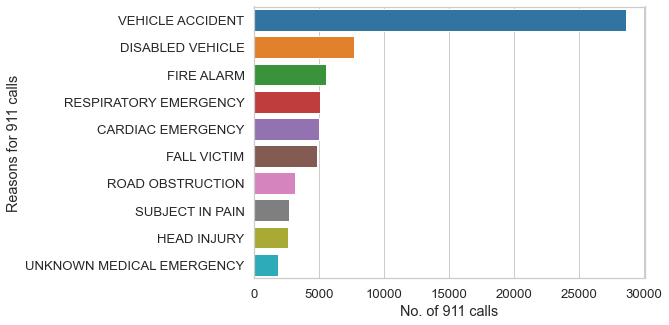

In [74]:
plt.figure(figsize=(7,5))

sns.countplot(y='reason',data=df, order=df['reason'].value_counts().head(10).index)

plt.xlabel('No. of 911 calls')
plt.ylabel('Reasons for 911 calls')

### Top 10 Reasons for 911 calls broken down by the time of call (AM Vs PM)

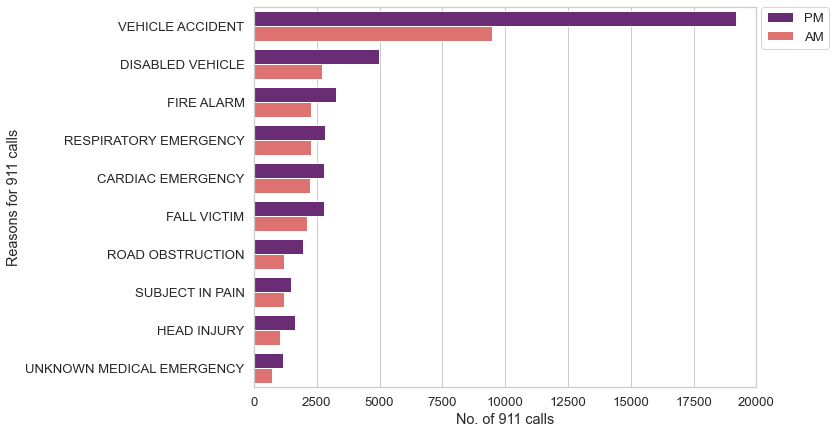

In [75]:
plt.figure(figsize=(9,7))

sns.countplot(y='reason',data=df, order=df['reason'].value_counts().head(10).index, hue = 'AM_PM',palette ='magma')

plt.xlabel('No. of 911 calls')
plt.ylabel('Reasons for 911 calls')
plt.xlim(0,20000)
plt.legend(loc=(1.01,0.89))

### Top 10 Reasons for 911 calls broken down by the Weekdays Vs Weekends

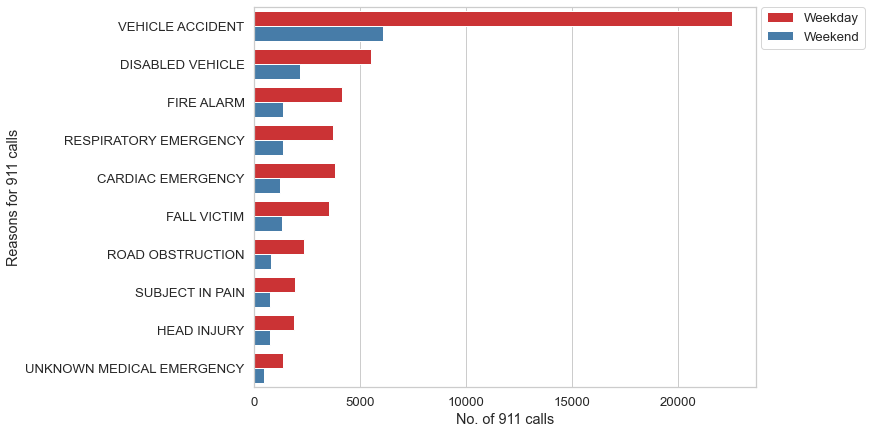

In [76]:
plt.figure(figsize=(9,7))

sns.countplot(y='reason',data=df, order=df['reason'].value_counts().head(10).index, hue = 'day_type',palette ='Set1')

plt.xlabel('No. of 911 calls')
plt.ylabel('Reasons for 911 calls')
plt.xlim(0,None)
plt.legend(loc=(1.01,0.89))

In [77]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,...,50,3,17,Thur,Dec,EMS,BACK PAINS/INJURY,PM,Weekday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,...,50,3,17,Thur,Dec,EMS,DIABETIC EMERGENCY,PM,Weekday,2015-12-10


### Top 5 townships with highest number of 911 calls broken down by category

(0.0, 4000.0)

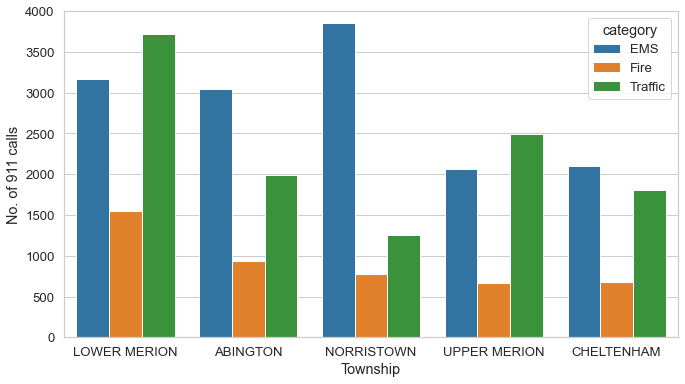

In [78]:
plt.figure(figsize=(11,6))

sns.countplot(x='twp',data=df, order = df['twp'].value_counts().index[:5], hue = 'category')

plt.xlabel('Township')
plt.ylabel('No. of 911 calls')
plt.ylim(0,4000)

### Top 5 townships with highest number of 911 calls broken down by top 5 reasons

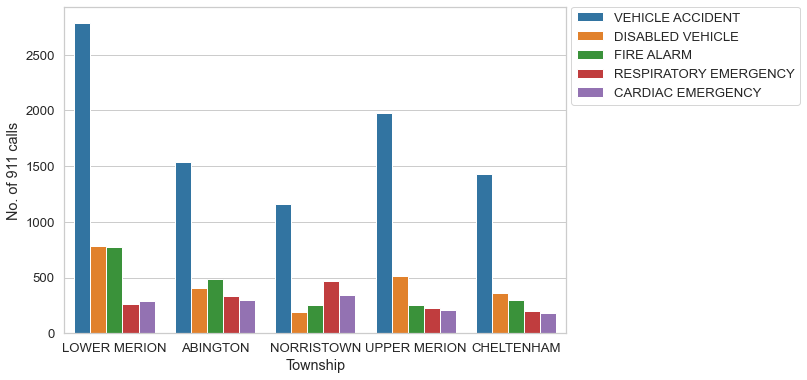

In [79]:
plt.figure(figsize=(9,6))

sns.countplot(x='twp',data=df, order = df['twp'].value_counts().index[:5], hue = 'reason', hue_order = df['reason'].value_counts().index[:5])

plt.xlabel('Township')
plt.ylabel('No. of 911 calls')
plt.ylim(0,None)
plt.legend(loc=(1.01,0.7))

In [80]:
# Top 10 towns with highest number of CARDIAC EMERGENCY cases 

df[df['reason']=='CARDIAC EMERGENCY']['twp'].value_counts().head(10)

NORRISTOWN          347
ABINGTON            302
LOWER MERION        292
POTTSTOWN           263
UPPER MERION        207
LOWER PROVIDENCE    199
UPPER MORELAND      193
CHELTENHAM          184
PLYMOUTH            157
SPRINGFIELD         151
Name: twp, dtype: int64

In [81]:
# Top 10 towns with highest number of RESPIRATORY EMERGENCY cases 

df[df['reason']=='RESPIRATORY EMERGENCY']['twp'].value_counts().head(10)

NORRISTOWN          470
ABINGTON            337
POTTSTOWN           314
LOWER MERION        263
UPPER MERION        224
CHELTENHAM          201
UPPER MORELAND      188
LOWER PROVIDENCE    159
SPRINGFIELD         158
PLYMOUTH            153
Name: twp, dtype: int64

In [82]:
# Top 10 towns with highest number of FIRE ALARM cases 

df[df['reason']=='FIRE ALARM']['twp'].value_counts().head(10)

LOWER MERION    772
ABINGTON        490
CHELTENHAM      299
UPPER MERION    253
NORRISTOWN      250
POTTSTOWN       198
WHITEMARSH      185
PLYMOUTH        180
SPRINGFIELD     152
HORSHAM         146
Name: twp, dtype: int64

In [83]:
# Top 10 towns with highest number of VEHICLE ACCIDENT cases 

df[df['reason']=='VEHICLE ACCIDENT']['twp'].value_counts().head(10)

LOWER MERION      2788
UPPER MERION      1981
ABINGTON          1541
CHELTENHAM        1434
NORRISTOWN        1164
PLYMOUTH          1133
UPPER MORELAND    1075
MONTGOMERY        1064
HORSHAM           1007
UPPER DUBLIN       924
Name: twp, dtype: int64

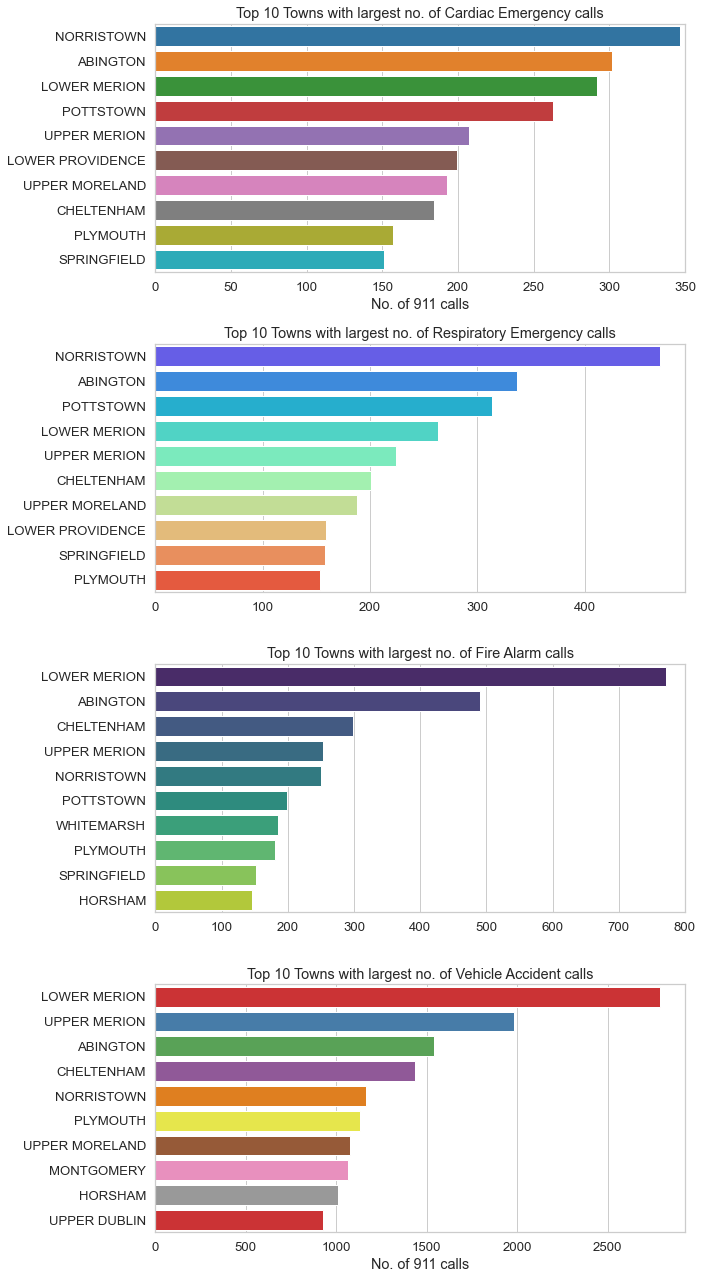

In [84]:
plt.figure(figsize=(10,18))

plt.subplot(4,1,1)
sns.countplot(y='twp',data=df[df['reason']=='CARDIAC EMERGENCY'],
              order=df[df['reason']=='CARDIAC EMERGENCY']['twp'].value_counts().index[:10])
plt.xlabel('No. of 911 calls')
plt.ylabel('')
plt.xlim(0,350)
plt.title('Top 10 Towns with largest no. of Cardiac Emergency calls')

plt.subplot(4,1,2)
sns.countplot(y='twp',data=df[df['reason']=='RESPIRATORY EMERGENCY'],
              order=df[df['reason']=='RESPIRATORY EMERGENCY']['twp'].value_counts().index[:10],
             palette = 'rainbow')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Towns with largest no. of Respiratory Emergency calls')

plt.subplot(4,1,3)
sns.countplot(y='twp',data=df[df['reason']=='FIRE ALARM'],
              order=df[df['reason']=='FIRE ALARM']['twp'].value_counts().index[:10],
             palette = 'viridis')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Towns with largest no. of Fire Alarm calls')
plt.xlim(0,800)

plt.subplot(4,1,4)
sns.countplot(y='twp',data=df[df['reason']=='VEHICLE ACCIDENT'],
              order=df[df['reason']=='VEHICLE ACCIDENT']['twp'].value_counts().index[:10],
             palette = 'Set1')
plt.xlabel('No. of 911 calls')
plt.ylabel('')
plt.title('Top 10 Towns with largest no. of Vehicle Accident calls')

plt.tight_layout()

### Distribution of 911 calls by day per category of call

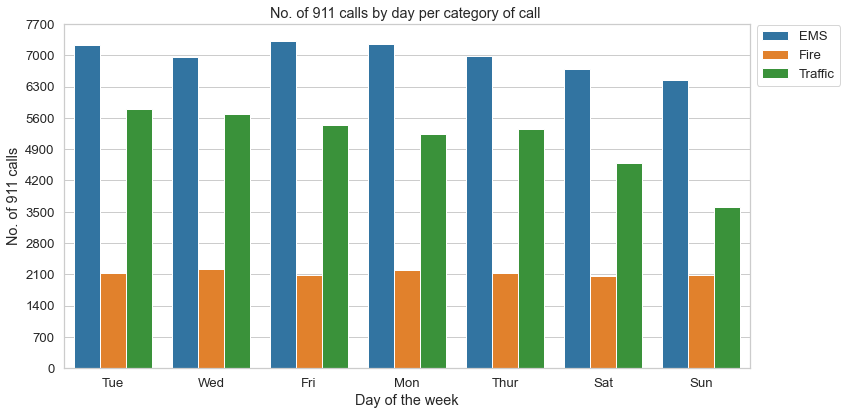

In [85]:
plt.figure(figsize=(12,6))

sns.countplot(x='day_name', data=df, hue='category', order=df['day_name'].value_counts().index)

plt.xlabel('Day of the week')
plt.ylabel('No. of 911 calls')
plt.legend(loc=(1.01,0.82))
plt.title('No. of 911 calls by day per category of call ')
plt.yticks(np.arange(0,8000,700))
plt.tight_layout()

### Distribution of 911 calls by day per reason of call

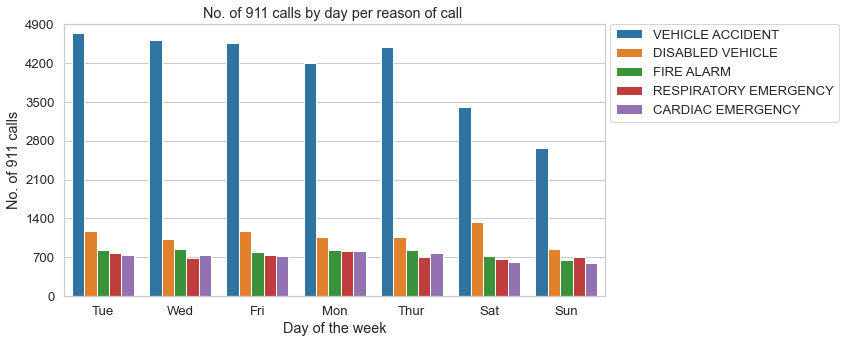

In [86]:
plt.figure(figsize=(12,5))

sns.countplot(x='day_name', data=df, hue='reason', order=df['day_name'].value_counts().index,
             hue_order=df['reason'].value_counts().index[:5])

plt.xlabel('Day of the week')
plt.ylabel('No. of 911 calls')
plt.legend(loc=(1.01,0.64))
plt.title('No. of 911 calls by day per reason of call ')
plt.yticks(np.arange(0,5000,700))
plt.ylim(0,4900)
plt.tight_layout()

### Distribution of 911 calls per day by top 5 reasons

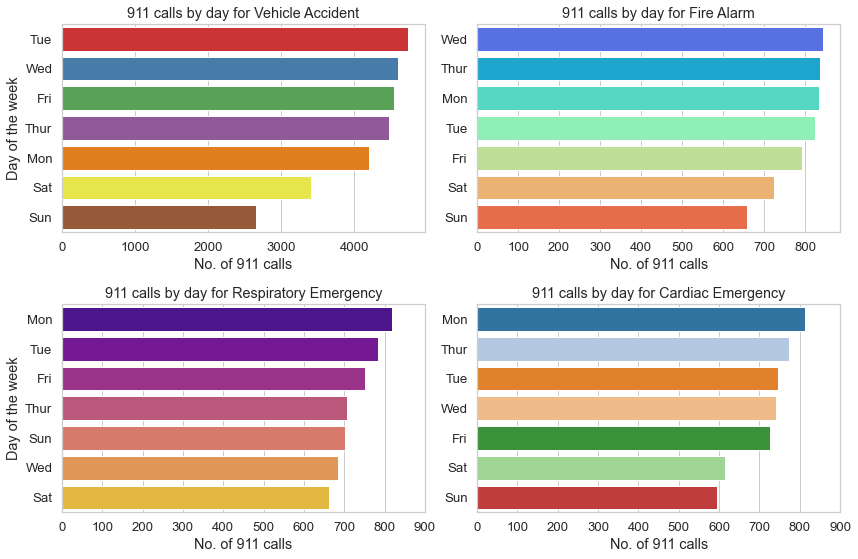

In [87]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='day_name',data=df[df['reason']=='VEHICLE ACCIDENT'],
              order=df[df['reason']=='VEHICLE ACCIDENT']['day_name'].value_counts().index, palette='Set1')
plt.xlabel('No. of 911 calls')
plt.ylabel('Day of the week')
plt.title('911 calls by day for Vehicle Accident')

plt.subplot(2,2,2)
sns.countplot(y='day_name',data=df[df['reason']=='FIRE ALARM'],
              order=df[df['reason']=='FIRE ALARM']['day_name'].value_counts().index, palette='rainbow')
plt.xlabel('No. of 911 calls')
plt.ylabel('')
plt.title('911 calls by day for Fire Alarm')

plt.subplot(2,2,3)
sns.countplot(y='day_name',data=df[df['reason']=='RESPIRATORY EMERGENCY'],
              order=df[df['reason']=='RESPIRATORY EMERGENCY']['day_name'].value_counts().index, palette='plasma')
plt.xlabel('No. of 911 calls')
plt.ylabel('Day of the week')
plt.title('911 calls by day for Respiratory Emergency')
plt.xlim(0,900)

plt.subplot(2,2,4)
sns.countplot(y='day_name',data=df[df['reason']=='CARDIAC EMERGENCY'],
              order=df[df['reason']=='CARDIAC EMERGENCY']['day_name'].value_counts().index, palette='tab20')
plt.xlabel('No. of 911 calls')
plt.ylabel('')
plt.title('911 calls by day for Cardiac Emergency')
plt.xlim(0,900)

plt.tight_layout()

## Trending Analysis - 911 calls over time (Monthly, Weekly & Daily)

**Let's first create a DataFrame group by object, called 'df_bydate'**

In [88]:
df_bydate = df.groupby('date').count()

In [89]:
df_bydate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type
date,,,,,,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389,389,389,389,389,389,389


In [90]:
df_bydate['e']

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: e, Length: 259, dtype: int64

In [91]:
df.groupby('month_name').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,category,reason,AM_PM,day_type,date
month_name,,,,,,,,,,,,,,,,,,,,
Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
Aug,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
Jul,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
Jun,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
Mar,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


In [92]:
new_month_order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']

df.groupby('month_name').count().reindex(labels=new_month_order, axis = 0)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,category,reason,AM_PM,day_type,date
month_name,,,,,,,,,,,,,,,,,,,,
Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
Mar,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423
Jun,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
Jul,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
Aug,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078


In [121]:
df['week_string'].unique()

array(['Wk50', 'Wk51', 'Wk52', 'Wk53', 'Wk1', 'Wk2', 'Wk3', 'Wk4', 'Wk5',
       'Wk6', 'Wk7', 'Wk8', 'Wk9', 'Wk10', 'Wk11', 'Wk12', 'Wk13', 'Wk14',
       'Wk15', 'Wk16', 'Wk17', 'Wk18', 'Wk19', 'Wk20', 'Wk21', 'Wk22',
       'Wk23', 'Wk24', 'Wk25', 'Wk26', 'Wk27', 'Wk28', 'Wk29', 'Wk30',
       'Wk31', 'Wk32', 'Wk33', 'Wk34'], dtype=object)

In [123]:
df.groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0).head(6)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type,date
week_string,,,,,,,,,,,,,,,,,,,,,
Wk50,1233,1233,1233,1046,1233,1233,1232,1222,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Wk51,2529,2529,2529,2226,2529,2529,2527,2515,2529,2529,...,2529,2529,2529,2529,2529,2529,2529,2529,2529,2529
Wk52,2783,2783,2783,2409,2783,2783,2782,2766,2783,2783,...,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783
Wk53,2346,2346,2346,2048,2346,2346,2343,2331,2346,2346,...,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346
Wk1,2799,2799,2799,2405,2799,2799,2798,2781,2799,2799,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
Wk2,2886,2886,2886,2550,2886,2886,2886,2871,2886,2886,...,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886


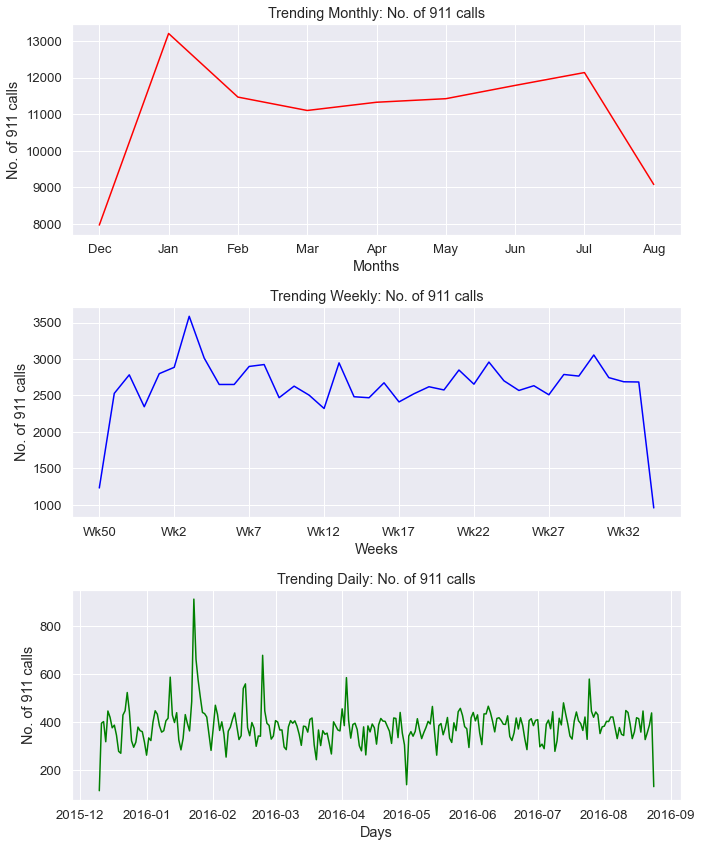

In [132]:
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
sns.lineplot(x='month_name',y='e',data=df.groupby('month_name').count().reindex(labels=new_month_order, axis = 0), color='r')
plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: No. of 911 calls')

plt.subplot(3,1,2)
sns.lineplot(x='week_string',y='e',
             data=df.groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),color='blue')

plt.xticks(np.arange(0,40,5))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: No. of 911 calls')

plt.subplot(3,1,3)
sns.lineplot(x='date',y='e',data=df_bydate, color = 'g')

plt.xlabel('Days')
plt.ylabel('No. of 911 calls')
plt.title('Trending Daily: No. of 911 calls')

plt.tight_layout()

# IMP OBSERVATION: Earlier we felt, that we had missing months, namely, Sep, Oct & Nov.
# Looking at this plot, I realize that we have continous data from Dec of 2015 to Aug, 2016.

### Trending Analysis - 911 calls for each category (daily)

In [96]:
df['category'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [97]:
df[df['category']=='EMS'].groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type
date,,,,,,,,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182


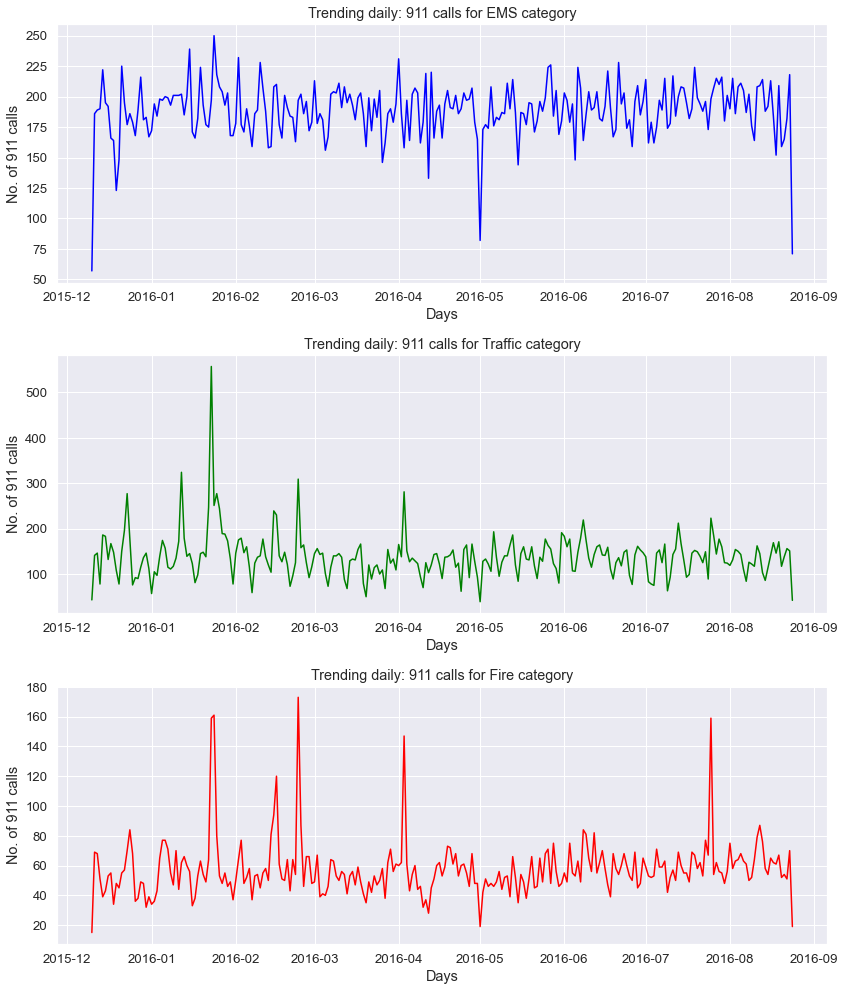

In [131]:
plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
sns.lineplot(x='date',y='e',data=df[df['category']=='EMS'].groupby('date').count(),color='b')
plt.xlabel('Days')
plt.ylabel('No. of 911 calls')
plt.title('Trending daily: 911 calls for EMS category')

plt.subplot(3,1,2)
sns.lineplot(x='date',y='e',data=df[df['category']=='Traffic'].groupby('date').count(),color='g')
plt.xlabel('Days')
plt.ylabel('No. of 911 calls')
plt.title('Trending daily: 911 calls for Traffic category')

plt.subplot(3,1,3)
sns.lineplot(x='date',y='e',data=df[df['category']=='Fire'].groupby('date').count(),color='r')
plt.xlabel('Days')
plt.ylabel('No. of 911 calls')
plt.title('Trending daily: 911 calls for Fire category')


plt.tight_layout()

### Trending Analysis - 911 calls for each of the top 5 reasons (Monthly & Weekly)

In [99]:
df['reason'].value_counts().head(5)

VEHICLE ACCIDENT         28639
DISABLED VEHICLE          7703
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
CARDIAC EMERGENCY         5012
Name: reason, dtype: int64

In [144]:
df[df['reason']=='VEHICLE ACCIDENT'].groupby('date').count().head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,week,day_of_week,hour,day_name,month_name,category,reason,AM_PM,day_type,week_string
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,30,30,30,24,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2015-12-11,121,121,121,93,121,121,120,119,121,121,...,121,121,121,121,121,121,121,121,121,121
2015-12-12,141,141,141,103,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
2015-12-13,61,61,61,51,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61


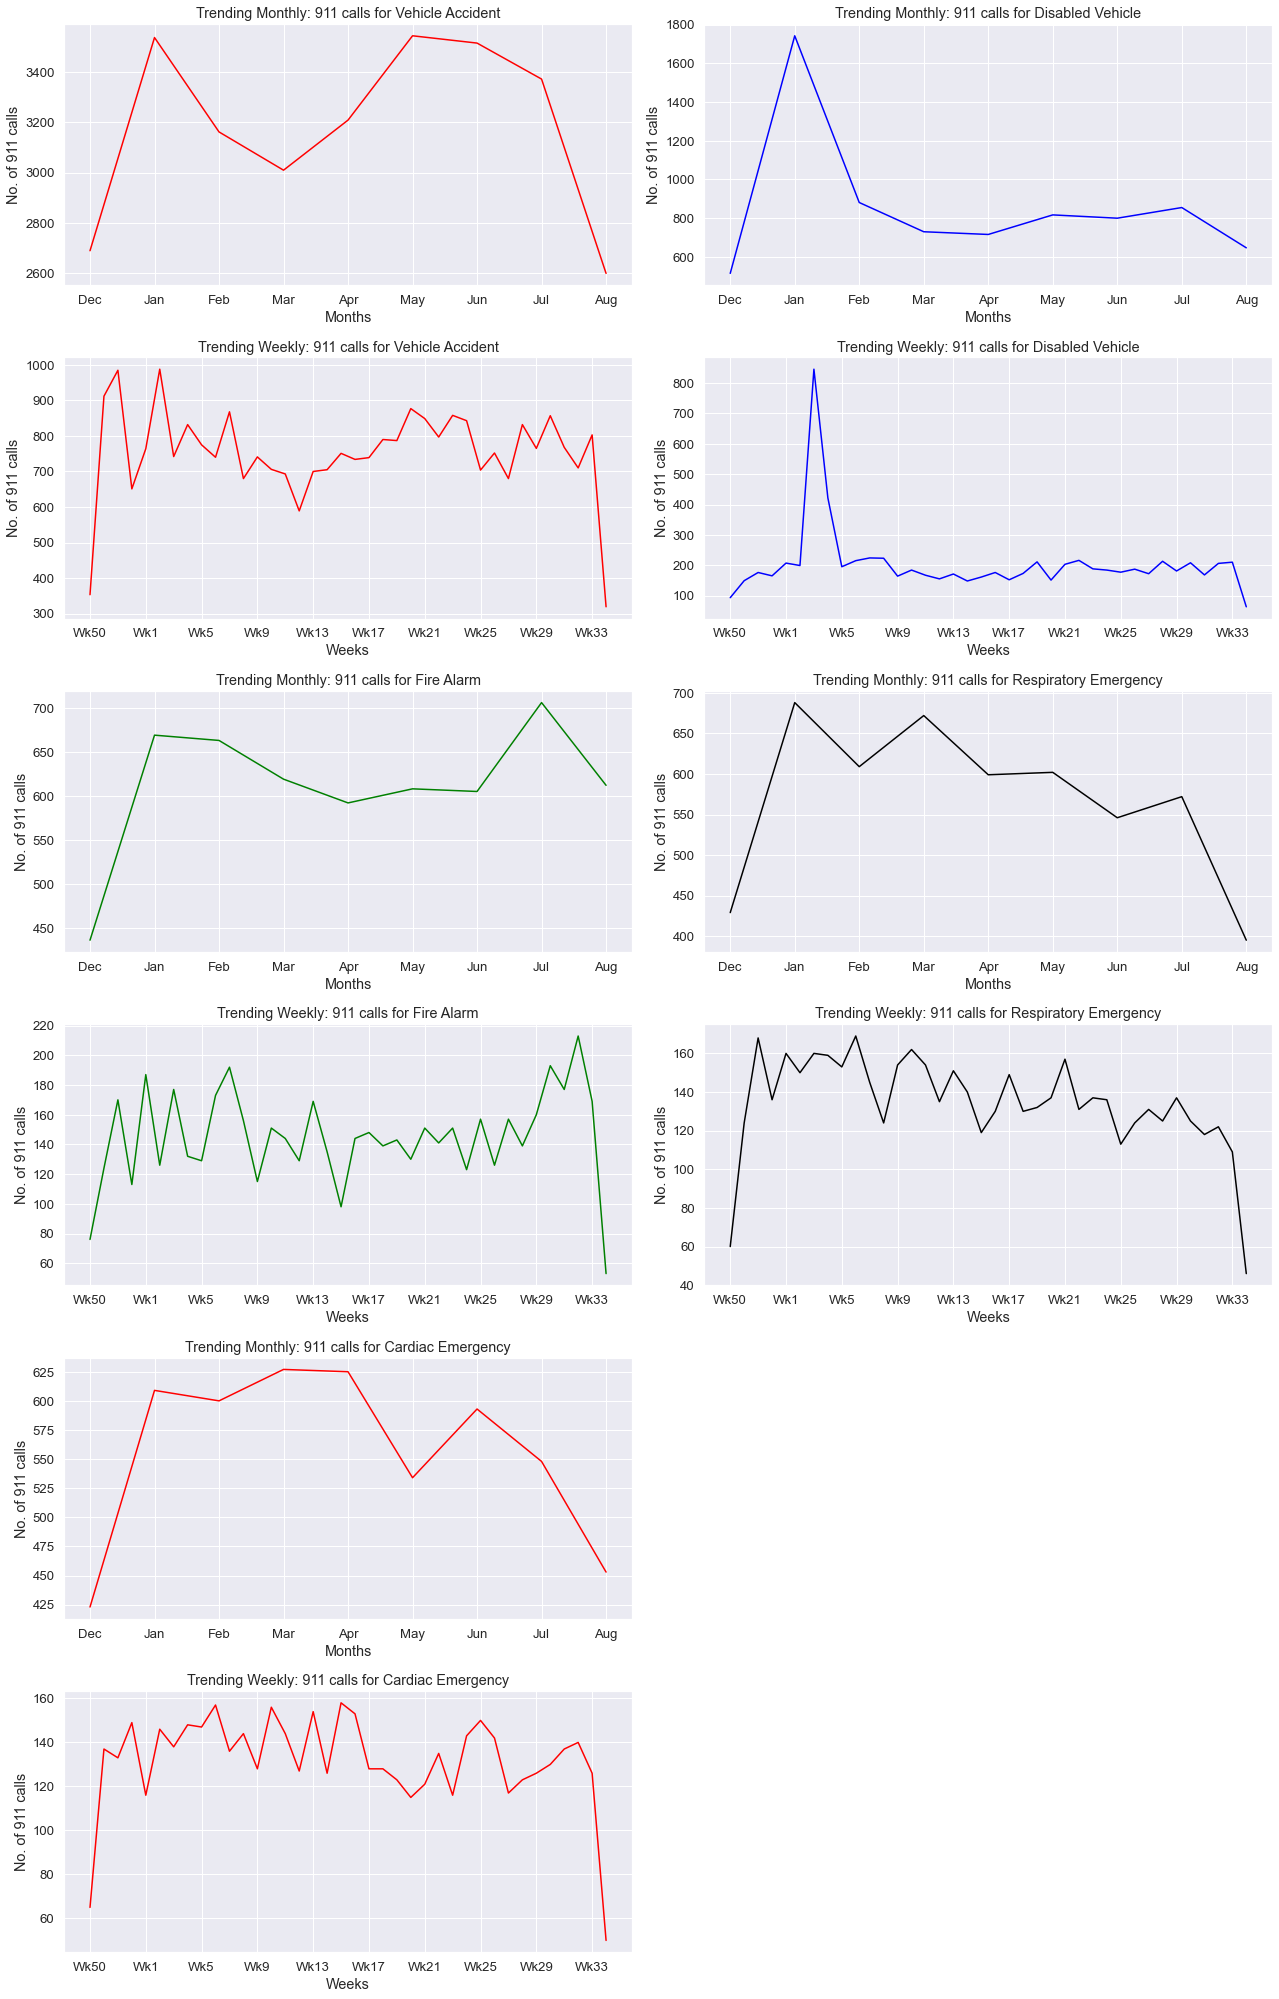

In [143]:
plt.figure(figsize=(18,28))

# Plot 1
plt.subplot(6,2,1)
sns.lineplot(x='month_name',y='e',
             data=df[df['reason']=='VEHICLE ACCIDENT'].groupby('month_name').count().reindex(labels=new_month_order, axis = 0),
            color='r')

plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: 911 calls for Vehicle Accident')


# Plot 2
plt.subplot(6,2,2)
sns.lineplot(x='month_name',y='e',
             data=df[df['reason']=='DISABLED VEHICLE'].groupby('month_name').count().reindex(labels=new_month_order, axis = 0),
            color='blue')

plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: 911 calls for Disabled Vehicle')


# Plot 3
plt.subplot(6,2,3)
sns.lineplot(x='week_string',y='e',
    data=df[df['reason']=='VEHICLE ACCIDENT'].groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),
    color='r')

plt.xticks(np.arange(0,40,4))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: 911 calls for Vehicle Accident')


# Plot 4
plt.subplot(6,2,4)
sns.lineplot(x='week_string',y='e',
    data=df[df['reason']=='DISABLED VEHICLE'].groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),
    color='blue')

plt.xticks(np.arange(0,40,4))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: 911 calls for Disabled Vehicle')


# Plot 5
plt.subplot(6,2,5)
sns.lineplot(x='month_name',y='e',
             data=df[df['reason']=='FIRE ALARM'].groupby('month_name').count().reindex(labels=new_month_order, axis = 0),
            color='g')

plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: 911 calls for Fire Alarm')


# Plot 6
plt.subplot(6,2,6)
sns.lineplot(x='month_name',y='e',
             data=df[df['reason']=='RESPIRATORY EMERGENCY'].groupby('month_name').count().reindex(labels=new_month_order, axis = 0),
            color='black')

plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: 911 calls for Respiratory Emergency')


# 7th Plot
plt.subplot(6,2,7)
sns.lineplot(x='week_string',y='e',
    data=df[df['reason']=='FIRE ALARM'].groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),
    color='g')

plt.xticks(np.arange(0,40,4))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: 911 calls for Fire Alarm')


# 8th Plot
plt.subplot(6,2,8)
sns.lineplot(x='week_string',y='e',
    data=df[df['reason']=='RESPIRATORY EMERGENCY'].groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),
    color='black')

plt.xticks(np.arange(0,40,4))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: 911 calls for Respiratory Emergency')


# 9th Plot
plt.subplot(6,2,9)
sns.lineplot(x='month_name',y='e',
             data=df[df['reason']=='CARDIAC EMERGENCY'].groupby('month_name').count().reindex(labels=new_month_order, axis = 0),
            color='r')

plt.xlabel('Months')
plt.ylabel('No. of 911 calls')
plt.title('Trending Monthly: 911 calls for Cardiac Emergency')


# 10th Plot
plt.subplot(6,2,11)
sns.lineplot(x='week_string',y='e',
    data=df[df['reason']=='CARDIAC EMERGENCY'].groupby('week_string').count().reindex(labels=df['week_string'].unique(),axis=0),
    color='r')

plt.xticks(np.arange(0,40,4))
plt.xlabel('Weeks')
plt.ylabel('No. of 911 calls')
plt.title('Trending Weekly: 911 calls for Cardiac Emergency')

plt.tight_layout()

In [147]:
df.groupby('hour').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,...,week,day_of_week,day_name,month_name,category,reason,AM_PM,day_type,date,week_string
hour,,,,,,,,,,,,,,,,,,,,,
0,2112,2112,2112,1869,2112,2112,2109,2105,2112,2112,...,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112
1,1721,1721,1721,1530,1721,1721,1718,1714,1721,1721,...,1721,1721,1721,1721,1721,1721,1721,1721,1721,1721
2,1549,1549,1549,1350,1549,1549,1548,1543,1549,1549,...,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
3,1435,1435,1435,1264,1435,1435,1433,1431,1435,1435,...,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435
4,1418,1418,1418,1254,1418,1418,1418,1415,1418,1418,...,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418


### Trending Hourly: 911 Calls 

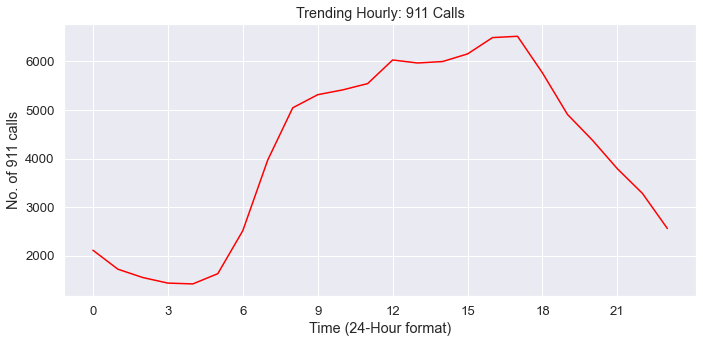

In [157]:
plt.figure(figsize=(10,5))

sns.lineplot(x='hour',y='e',data=df.groupby('hour').count(), color = 'r')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls')

plt.tight_layout()

### Trending Hourly: 911 Calls per Category

In [159]:
df['category'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

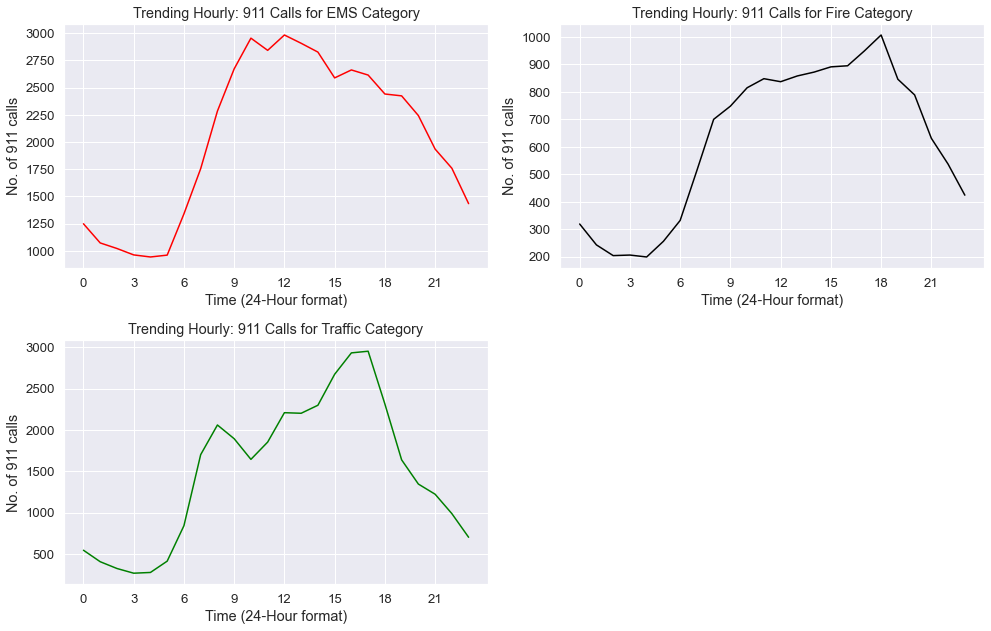

In [164]:
plt.figure(figsize=(14,9))


# Plot 1
plt.subplot(2,2,1)
sns.lineplot(x='hour',y='e',data=df[df['category']=='EMS'].groupby('hour').count(), color = 'r')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for EMS Category')

# Plot 2
plt.subplot(2,2,2)
sns.lineplot(x='hour',y='e',data=df[df['category']=='Fire'].groupby('hour').count(), color = 'black')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Fire Category')


# Plot 3
plt.subplot(2,2,3)
sns.lineplot(x='hour',y='e',data=df[df['category']=='Traffic'].groupby('hour').count(), color = 'green')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Traffic Category')

plt.tight_layout()

### Trending Hourly: 911 Calls for each of the top 5 Reasons

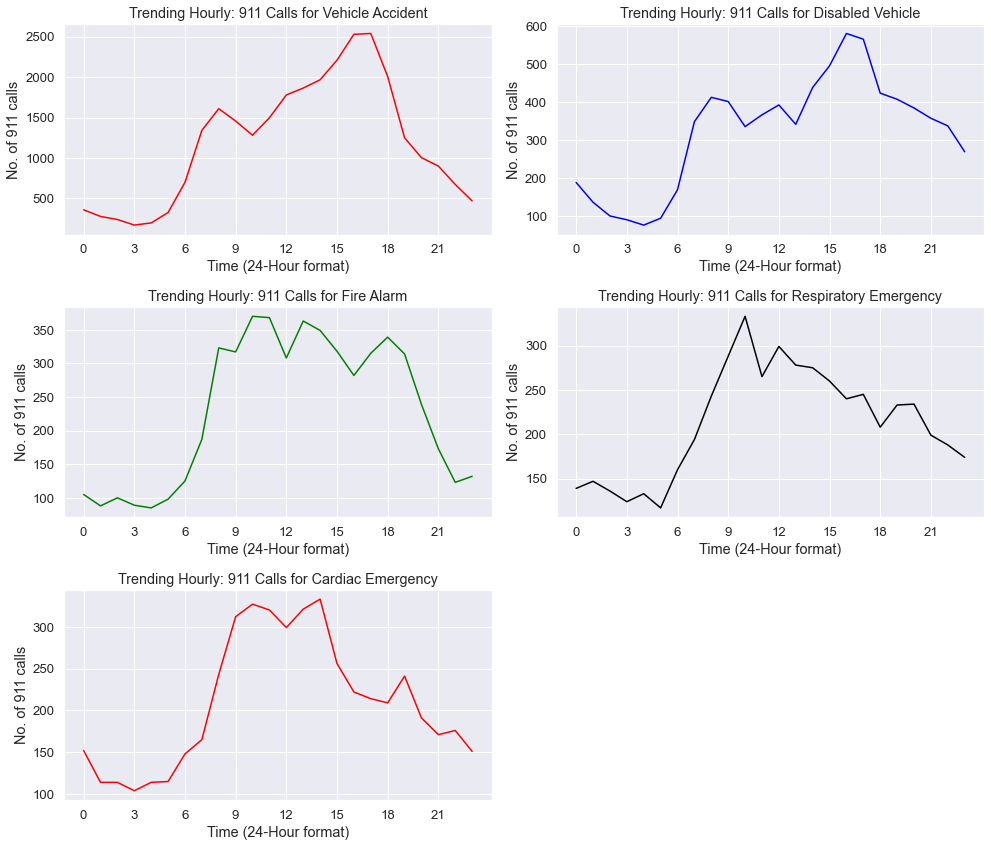

In [167]:
plt.figure(figsize=(14,12))

# Plot 1
plt.subplot(3,2,1)

sns.lineplot(x='hour',y='e',data=df[df['reason']=='VEHICLE ACCIDENT'].groupby('hour').count(), color = 'r')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Vehicle Accident')


# Plot 2
plt.subplot(3,2,2)

sns.lineplot(x='hour',y='e',data=df[df['reason']=='DISABLED VEHICLE'].groupby('hour').count(), color = 'b')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Disabled Vehicle')


# Plot 3
plt.subplot(3,2,3)

sns.lineplot(x='hour',y='e',data=df[df['reason']=='FIRE ALARM'].groupby('hour').count(), color = 'g')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Fire Alarm')


# Plot 4
plt.subplot(3,2,4)

sns.lineplot(x='hour',y='e',data=df[df['reason']=='RESPIRATORY EMERGENCY'].groupby('hour').count(), color = 'black')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Respiratory Emergency')


# Plot 5
plt.subplot(3,2,5)

sns.lineplot(x='hour',y='e',data=df[df['reason']=='CARDIAC EMERGENCY'].groupby('hour').count(), color = 'r')

plt.xticks(np.arange(0,24,3))
plt.xlabel('Time (24-Hour format)')
plt.ylabel('No. of 911 calls')
plt.title('Trending Hourly: 911 Calls for Cardiac Emergency')

plt.tight_layout()

### Cluster Map - 911 Calls distributed over Days & Hours

In [179]:
df.groupby(['day_name','hour']).count().unstack()['e']

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


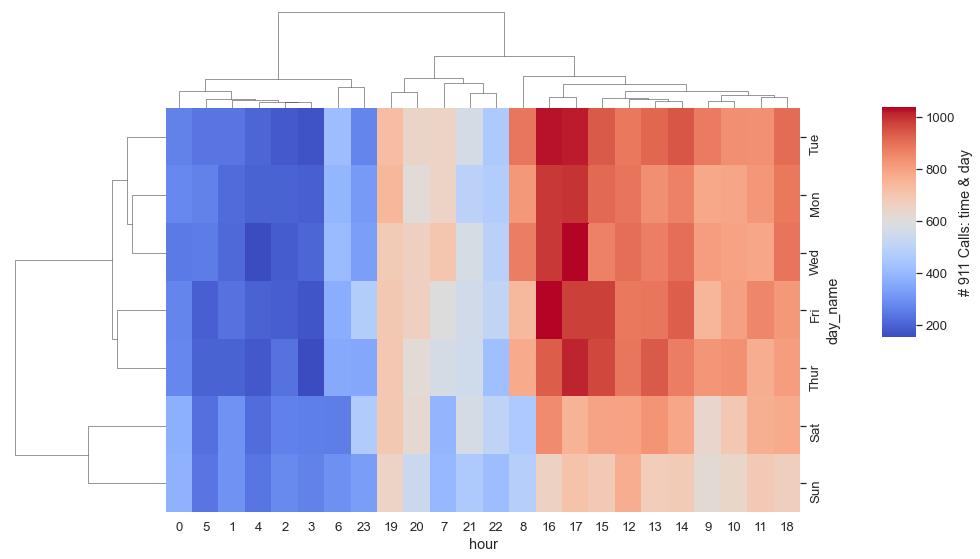

In [227]:
sns.clustermap(data = df.groupby(['day_name','hour']).count().unstack()['e'], cmap = 'coolwarm',
              cbar_kws = {'label':'# 911 Calls: time & day'}, cbar_pos = (1.03,0.4,0.04,0.4),
              figsize=(12,8))

### Cluster Map - 911 Calls distributed over Months and Days

In [207]:
df.groupby(['month_name','day_name']).count().unstack()['e']

day_name,Fri,Mon,Sat,Sun,Thur,Tue,Wed
month_name,,,,,,,
Apr,1958,1598,1734,1488,1601,1430,1517
Aug,1310,1511,1099,1021,1230,1612,1295
Dec,1065,1257,978,907,1266,1234,1262
Feb,1581,1964,1441,1229,1596,1753,1903
Jan,1970,1727,2291,1960,1584,1973,1700
Jul,2045,1692,1695,1672,1646,1670,1717
Jun,1649,1617,1388,1333,2065,1676,2058
Mar,1525,1535,1266,1102,1900,1884,1889
May,1730,1779,1444,1424,1590,1918,1538


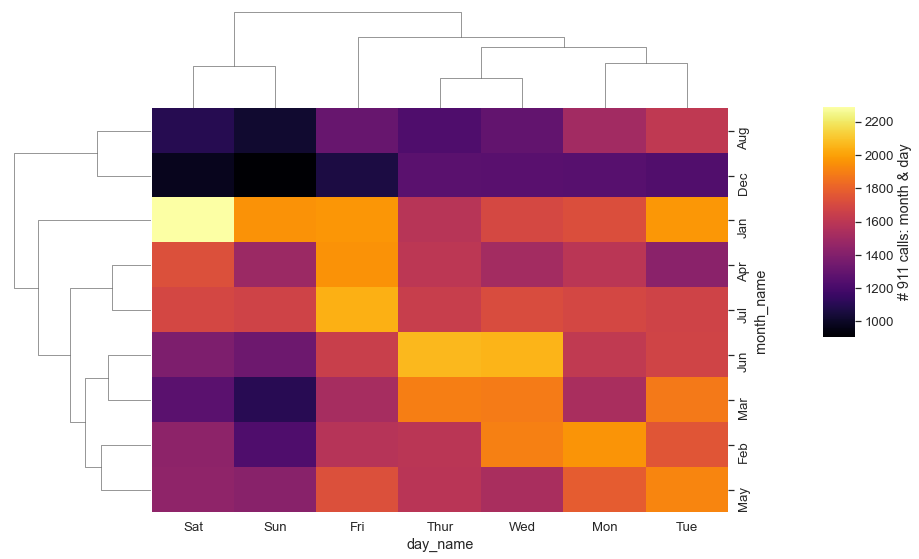

In [228]:
sns.clustermap(data = df.groupby(['month_name','day_name']).count().unstack()['e'], cmap = 'inferno',
              cbar_kws = {'label':'# 911 calls: month & day'}, cbar_pos = (1.05,0.4,0.04,.4),
              figsize=(11,8))

## The End!